# Analyzing Global Temperatures

This project analyzes local temperature trends to overall global temperature trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load local temperature data

In [2]:
ldf = pd.read_csv('data/sandiegotemp.csv')
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   avg_temp  165 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [3]:
# view data
ldf

,year,avg_temp
0,1849,16.03
1,1850,15.55
2,1851,15.66
3,1852,16.06
4,1853,16.69
...,...,...
160,2009,17.03
161,2010,16.19
162,2011,16.26
163,2012,17.20


Load global temperature data

In [4]:
gdf = pd.read_csv('data/globaltemp.csv')
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [5]:
# Align temperature data years to local temperature years
gdf=gdf.loc[gdf['year']>1848]
gdf= gdf.loc[gdf['year']<2014]
gdf

,year,avg_temp
99,1849,7.98
100,1850,7.90
101,1851,8.18
102,1852,8.10
103,1853,8.04
...,...,...
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51


Check local and global temperature description statistics

In [6]:
gdf.describe()

,year,avg_temp
count,165.000000,165.000000
mean,1931.000000,8.554545
std,47.775517,0.460165
min,1849.000000,7.560000
25%,1890.000000,8.190000
50%,1931.000000,8.530000
75%,1972.000000,8.770000
max,2013.000000,9.730000


In [7]:
ldf.describe()

,year,avg_temp
count,165.000000,165.000000
mean,1931.000000,16.126364
std,47.775517,0.546219
min,1849.000000,14.660000
25%,1890.000000,15.740000
50%,1931.000000,16.120000
75%,1972.000000,16.460000
max,2013.000000,17.460000


### Correlation calculation

In [8]:
# Compute pairwise correlation of columns
round(gdf['avg_temp'].corr(ldf['avg_temp']), 4)

0.1283

In [9]:
round(ldf['avg_temp'].corr(gdf['avg_temp']), 4)

0.1283

Visualize Global and local average temperatures

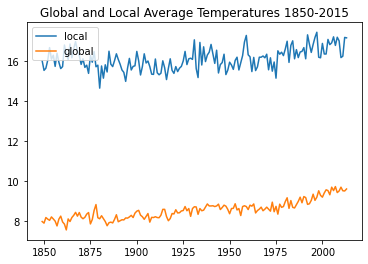

In [10]:
from cProfile import label

from matplotlib.pyplot import legend


#plt.figure(figsize=(14,10))
plt.title('Global and Local Average Temperatures 1850-2015')
plt.plot(ldf['year'], ldf['avg_temp'], label='San Diego Temperatures')
plt.plot(gdf['year'], gdf['avg_temp'], label='Global Temperatures')
plt.legend(('local', 'global'), loc='upper left');

In [11]:
# Calculate the 10 year rolling mean for average global temperatures
gdf['10 year MA']=gdf.avg_temp.rolling(10).mean()
gdf

,year,avg_temp,10 year MA
99,1849,7.98,NaN
100,1850,7.90,NaN
101,1851,8.18,NaN
102,1852,8.10,NaN
103,1853,8.04,NaN
...,...,...,...
259,2009,9.51,9.493
260,2010,9.70,9.543
261,2011,9.52,9.554
262,2012,9.51,9.548


In [12]:
# Calculate the 10 year rolling mean for average local temperatures
ldf['10 year MA']=ldf.avg_temp.rolling(10).mean()
ldf

,year,avg_temp,10 year MA
0,1849,16.03,NaN
1,1850,15.55,NaN
2,1851,15.66,NaN
3,1852,16.06,NaN
4,1853,16.69,NaN
...,...,...,...
160,2009,17.03,16.878
161,2010,16.19,16.807
162,2011,16.26,16.796
163,2012,17.20,16.879


Visualize global and local 10 year moving averages

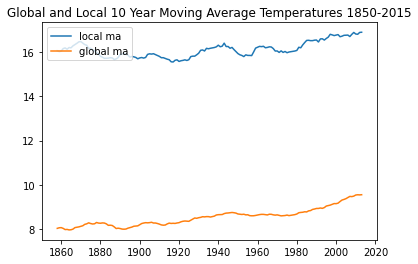

In [13]:
# plot rolling average
plt.title('Global and Local 10 Year Moving Average Temperatures 1850-2015')
plt.plot(ldf['year'], ldf['10 year MA'], label='San Diego MA Temperatures')
plt.plot(gdf['year'], gdf['10 year MA'], label='Global MA Temperatures')
plt.legend(('local ma', 'global ma'), loc='upper left')

Highest Temperature minus Lowest Temperature: City and Global

In [14]:
round(gdf['avg_temp'].max() - gdf['avg_temp'].min(), 3)

2.17

In [15]:
round(ldf['avg_temp'].max() - ldf['avg_temp'].min(), 3)

2.8

### Change in Temperature
2013 Average Temperatures minus 1849 Average Temperatures

In [16]:
g13=gdf.loc[gdf['year']==2013]


In [17]:
g49=gdf.loc[gdf['year']==1849]


In [18]:
round(g13.iloc[0]['avg_temp'] - g49.iloc[0]['avg_temp'], 3)

1.63

In [19]:
l13=ldf.loc[ldf['year']==2013]
l13

,year,avg_temp,10 year MA
164,2013,17.18,16.887


In [20]:
l49=ldf.loc[ldf['year']==1849]
l49

,year,avg_temp,10 year MA
0,1849,16.03,NaN


In [21]:
round(l13.iloc[0]['avg_temp'] - l49.iloc[0]['avg_temp'], 3)

1.15

### Line of Best Fit

In [22]:
a, b = np.polyfit(gdf['year'], gdf['avg_temp'], 1)

y = -7.50 + 0.01x


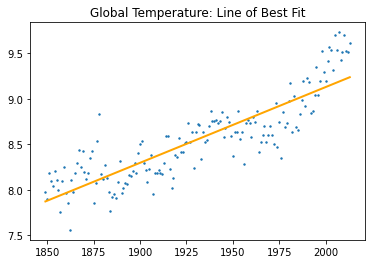

In [23]:
plt.scatter(gdf['year'], gdf['avg_temp'], s=2)
plt.plot(gdf['year'], a*gdf['year']+b, color="orange", linewidth=2)
plt.title('Global Temperature: Line of Best Fit')
print('y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x')

In [24]:
round(a, 4)

0.0083

In [25]:
c, d = np.polyfit(ldf['year'], ldf['avg_temp'], 1)

y = 6.79 + 0.00x


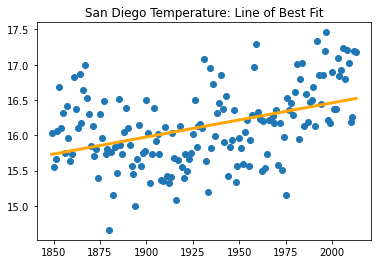

In [26]:
from turtle import color


plt.scatter(ldf['year'], ldf['avg_temp'])
plt.plot(ldf['year'], c*ldf['year']+d, color="orange", linewidth=3)
plt.title('San Diego Temperature: Line of Best Fit')
print('y = ' + '{:.2f}'.format(d) + ' + {:.2f}'.format(c) + 'x')

In [27]:
round(c, 4)

0.0048

### Observations

- Observation 1- general temperature

    ■ Data is actual temperature, not anomaly values.

    ■ San Diego is quite a bit warmer on average compared to the global average.

- Observation 2 - Comparing Temperature Changes

    ■ Though Global Temperatures are consistently lower than San Diego, San Diego Temperatures are rising slower than Global Average Temperatures.

- Observation 3 - the overall trend

    ■ The world getting hotter over time.

    ■ The trend of temperature rising is more easily observable in the average global temperatures.

- Observation 4 - the spread of data

    ■ There is more variance in the local temperature data from San Diego than there is in the Global Temperature data.

    ■ Sand Diego std: 0.546219

    ■ Global std: 0.460165

- Observation 5 - correlation

    ■ There is a small positive linear relationship between the variables, r = 0.1283.